# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [19]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [20]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.zeros((n+1,self.ndim))
        
        # YOUR CODE HERE
        for i in range(0,n+1):
            
            positions[i]=self.pos
            self.pos= self.pos+self.pickStep()
           
        return positions

In [21]:
ndim=2
w = walker([0,0,0],ndim=3)
#print(w)
pos_test = w.doSteps(10)
print(pos_test)

[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1. -1.]
 [ 1.  1. -1.]
 [ 0.  1. -1.]
 [ 0.  1. -2.]
 [ 0.  2. -2.]
 [ 0.  2. -1.]
 [ 0.  1. -1.]
 [ 1.  1. -1.]
 [ 0.  1. -1.]]


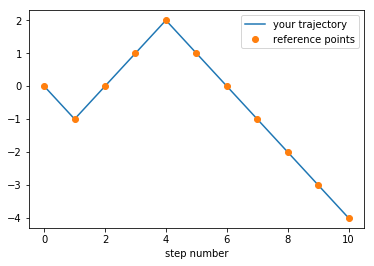

In [22]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

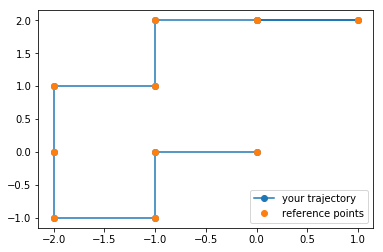

In [23]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

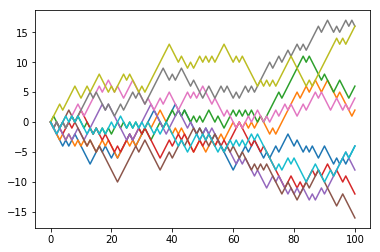

In [24]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


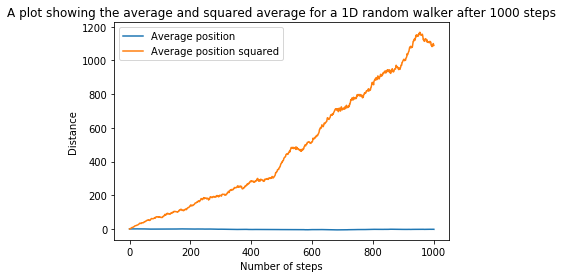

In [25]:
nsteps = 1000
ndim = 1
nwalkers = 100

post = numpy.zeros((nsteps+1,nwalkers))
for i in range(0,nwalkers):
    w=walker(numpy.zeros(ndim))
    post[:,i]=w.doSteps(nsteps).T

av_p=numpy.zeros(nsteps+1)
av_p2=numpy.zeros(nsteps+1)

for i in range(0,nsteps+1):
    av_p[i]=numpy.average(post[i,:])
    av_p2[i]=numpy.average(post[i,:]**2)


xs= numpy.linspace(0,nsteps,nsteps+1)
plt.plot(xs,av_p,label="Average position")
plt.plot(xs,av_p2,label="Average position squared")
plt.legend()
plt.title("A plot showing the average and squared average for a 1D random walker after 1000 steps")
plt.ylabel("Distance")
plt.xlabel("Number of steps")
plt.show()

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


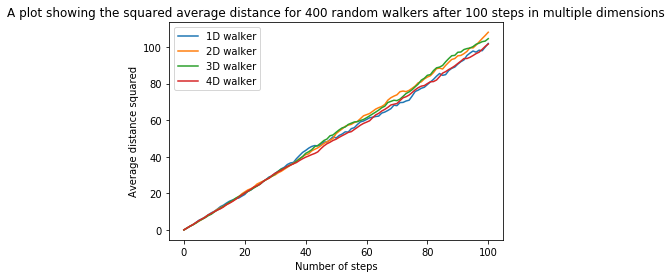

In [26]:
tsteps = 100
twalkers = 400
dimensions = range(1,5)
def squaredis(steps,walkers,dim):
    rsq=numpy.zeros([walkers,steps+1])
    for i in range(0,walkers):
        w=walker(numpy.zeros(ndim), ndim=dim)
        arr=w.doSteps(steps)
        #print(arr)
        #rsq=numpy.zeros([walkers,steps+1])
        for j in range(0,steps+1):
            row= arr[j,:]
            sqrow= numpy.square(row)
            rsq[i,j]=numpy.sum(sqrow)
        rsqav=numpy.zeros(steps+1)
        #print(rsq)
        for k in range(0,steps+1):
            rsqav[k]=numpy.average(rsq[:,k])
    return rsqav
#(squaredis(5,100,3))
xs= numpy.linspace(0,tsteps,tsteps+1)
for l in dimensions:
    ys=squaredis(tsteps,twalkers,l)
    dimnum = l
    plt.plot(xs,ys, label= "{}D walker".format(dimnum))
plt.legend()
plt.title("A plot showing the squared average distance for 400 random walkers after 100 steps in multiple dimensions")
plt.ylabel("Average distance squared")
plt.xlabel("Number of steps")
plt.show()

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


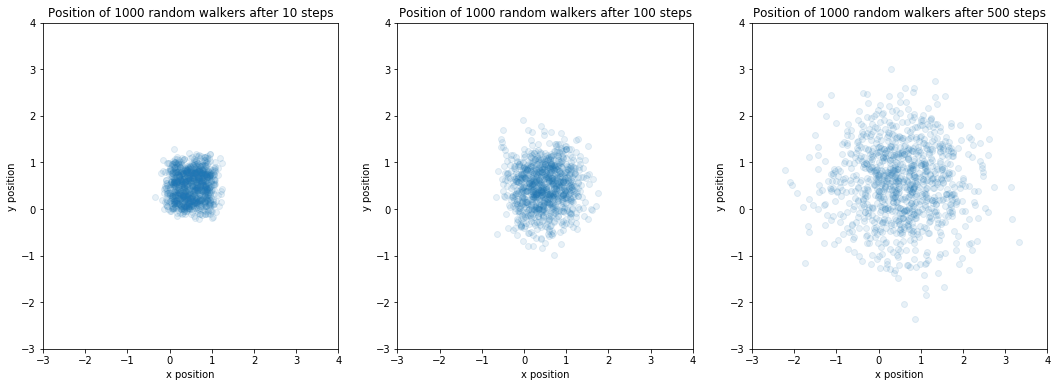

In [27]:
tdim=2
twalkers=1000

rand_pos = numpy.random.uniform(size=(twalkers, tdim))
# this code is a template to create 3 subplots in one, adapt it to your task!

plt.figure(figsize=(18,6))
plt.title("A series of plots showing the movement of 1000 random walkers after varying numbers of steps")
for i, tsteps in enumerate([10,100,500]):
    fin_pos=numpy.zeros([twalkers, tdim])
    for j in range(0,twalkers):
        w=walker(rand_pos[j,:],tdim, step_size=0.05)
        pos=w.doSteps(tsteps)
        fin_pos[j,:]=pos[-1]
    
    plt.subplot(131+i)
    plt.ylabel("y position")
    plt.xlabel("x position")
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("Position of 1000 random walkers after {} steps".format(tsteps))    
    plt.scatter(fin_pos[:,0], fin_pos[:,1], alpha=0.1)